# Installing Required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import PIL
import glob
import os
from IPython.display import Image

import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
from torchvision.transforms import transforms
from torchinfo import summary



#EDA

Separate the Dataset into its respective labels

In [ ]:
input_path="/content/drive/MyDrive/sarscov2-ctscan-dataset/" #Change your respective filepath
class_labels=os.listdir(input_path)
del class_labels[0]
print(class_labels)

['non-COVID', 'COVID']


Checking for Class Imbalance

In [ ]:
number_classes = {'Non-Covid_0': len(os.listdir('/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/')),
'Covid_1': len(os.listdir('/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/'))} #Change your respective filepath
class_labels=os.listdir(input_path)

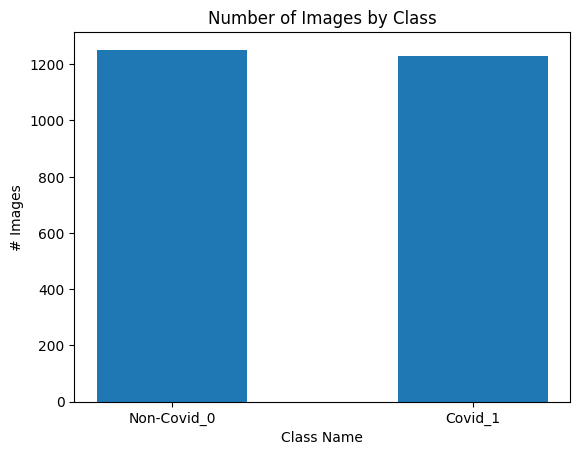

In [ ]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [ ]:
from PIL import Image
#Insert your file path here
directories = {'Non-Covid_0': '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/',
'Covid_1': '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/'}

#test=Image.open('/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (145).png')

def get_dims(file):
  '''Returns dimenstions for an RBG image'''
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

Looking at Pixel Structure for both Classes

['/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (145).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (150).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (26).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (131).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (219).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (165).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (266).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (235).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (169).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (216).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (231).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (192).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (124).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (226

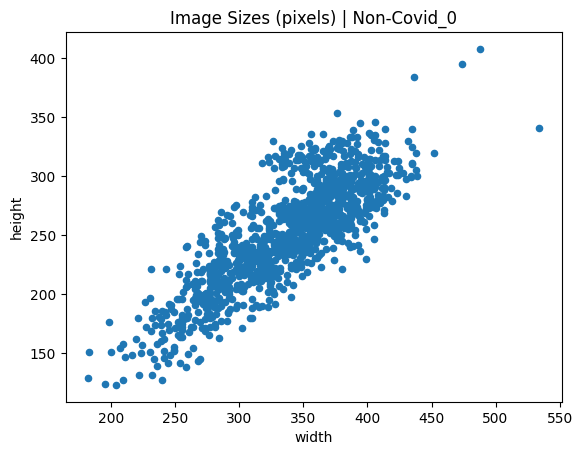

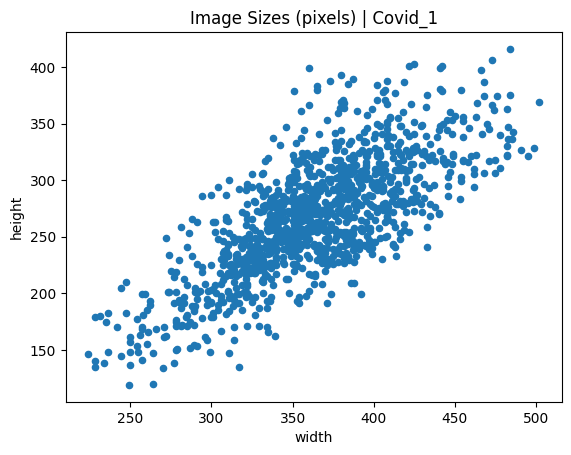

In [ ]:
import dask.bag as db
from dask.diagnostics import ProgressBar
for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  print(filelist)
  dims = db.from_sequence(filelist).map(get_dims)

  pbar = ProgressBar()
  pbar.register() # global registration
  dims = dims.compute()
  dim_df = pd.DataFrame(dims, columns=['height', 'width'])
  sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
  sizes.plot.scatter(x='width', y='height');
  plt.title('Image Sizes (pixels) | {}'.format(n))

Creating Lables in Dataset to inspect Images

In [ ]:
filepaths=glob.glob(input_path+"**/*.*")
print(filepaths[:10])

['/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1046).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1147).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1124).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (1069).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (237).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (163).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (171).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (229).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (172).png', '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (2).png']


In [ ]:
df=pd.DataFrame() #Data reads in Non-COVID data into dataframe first
df['filepaths']=filepaths
df.head(10)

,filepaths
0,/content/drive/MyDrive/sarscov2-ctscan-dataset...
1,/content/drive/MyDrive/sarscov2-ctscan-dataset...
2,/content/drive/MyDrive/sarscov2-ctscan-dataset...
3,/content/drive/MyDrive/sarscov2-ctscan-dataset...
4,/content/drive/MyDrive/sarscov2-ctscan-dataset...
5,/content/drive/MyDrive/sarscov2-ctscan-dataset...
6,/content/drive/MyDrive/sarscov2-ctscan-dataset...
7,/content/drive/MyDrive/sarscov2-ctscan-dataset...
8,/content/drive/MyDrive/sarscov2-ctscan-dataset...
9,/content/drive/MyDrive/sarscov2-ctscan-dataset...


In [ ]:
df.tail(10)

,filepaths
2471,/content/drive/MyDrive/sarscov2-ctscan-dataset...
2472,/content/drive/MyDrive/sarscov2-ctscan-dataset...
2473,/content/drive/MyDrive/sarscov2-ctscan-dataset...
2474,/content/drive/MyDrive/sarscov2-ctscan-dataset...
2475,/content/drive/MyDrive/sarscov2-ctscan-dataset...
2476,/content/drive/MyDrive/sarscov2-ctscan-dataset...
2477,/content/drive/MyDrive/sarscov2-ctscan-dataset...
2478,/content/drive/MyDrive/sarscov2-ctscan-dataset...
2479,/content/drive/MyDrive/sarscov2-ctscan-dataset...
2480,/content/drive/MyDrive/sarscov2-ctscan-dataset...


Non-COVID Image

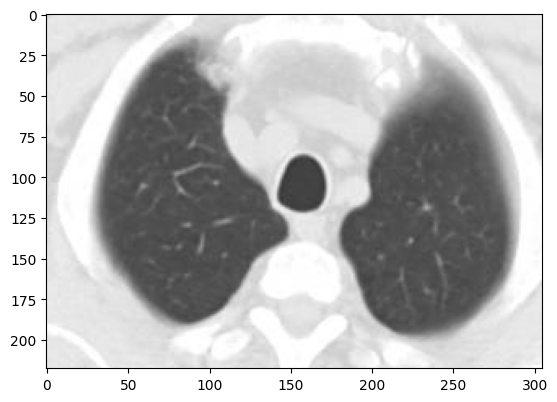

In [ ]:
data_no_covid=plt.imread(df['filepaths'][0])
plt.imshow(data_no_covid)
plt.show()

COVID Image

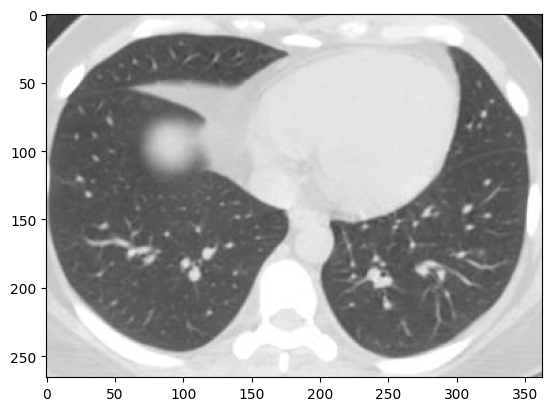

In [ ]:
data_covid=plt.imread(df['filepaths'][2478]) #Showing example of Non-Covid CT image
plt.imshow(data_covid)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data Augmentation

In [ ]:
image_size = (250,250)
batch_size = 16

data= tf.keras.utils.image_dataset_from_directory(
    input_path,
    validation_split=0.2,
    label_mode='int',
    labels='inferred',
    color_mode='grayscale',
    shuffle=True,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2481 files belonging to 2 classes.
Using 1985 files for training.
Using 496 files for validation.


In [ ]:
# https://www.tensorflow.org/tutorials/images/transfer_learning
val_batches = tf.data.experimental.cardinality(data[1])
test_ds = data[1].take(val_batches // 5)
val_ds = data[1].skip(val_batches // 5)
train_ds= data[0]

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

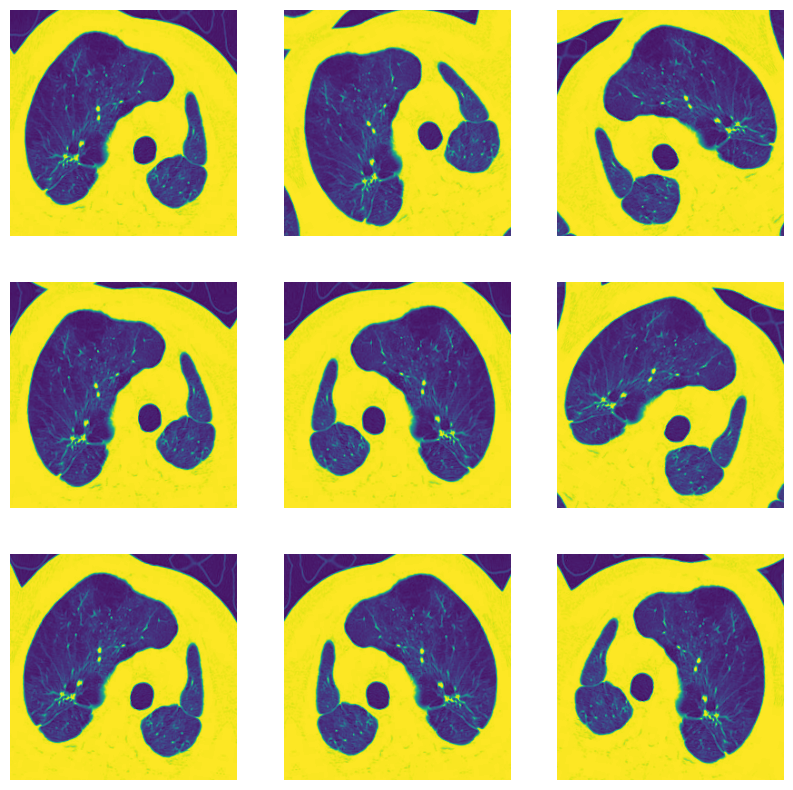

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

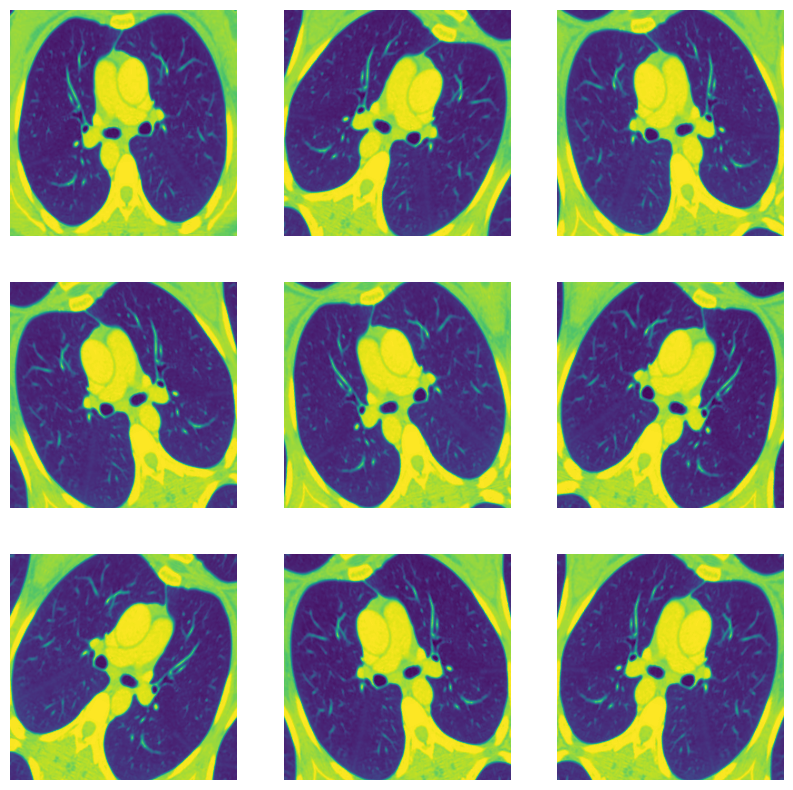

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in val_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

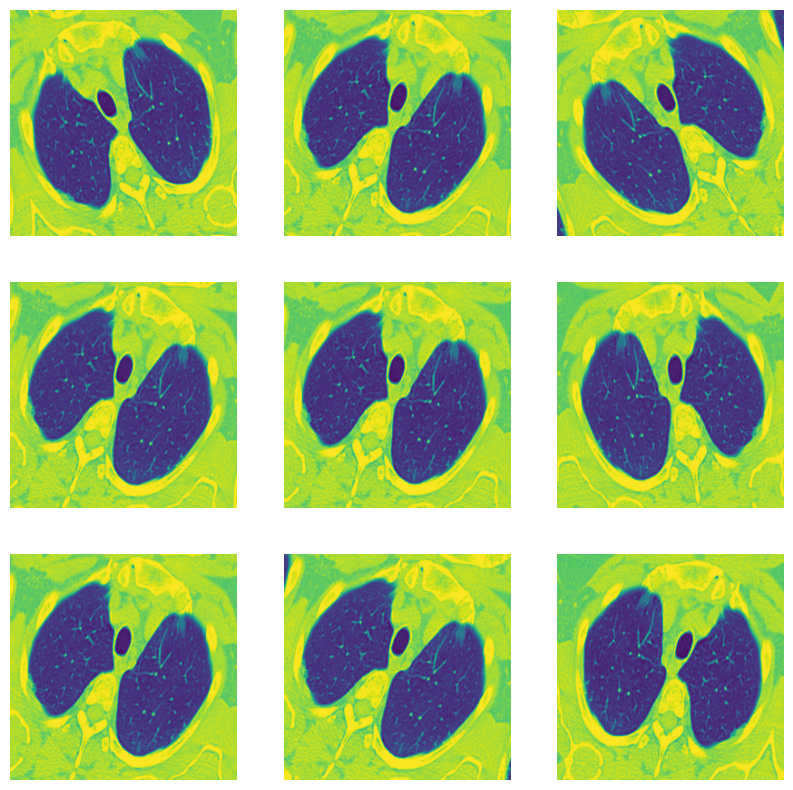

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in test_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Configure Dataset

In [ ]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
val_ds = val_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)




The tf.data API provides a software pipelining mechanism through the tf.data.Dataset.prefetch transformation, which can be used to decouple the time when data is produced from the time when data is consumed. In particular, the transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested. The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step. You could either manually tune this value, or set it to tf.data.experimental.AUTOTUNE which will prompt the tf.data runtime to tune the value dynamically at runtime.

https://stackoverflow.com/questions/56613155/tensorflow-tf-data-autotune

Creating basic CNN with 1 hidden layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization

model = Sequential()

#LAYER 1
model.add(Conv2D(128, kernel_size=3,
                 input_shape=(image_size[0], image_size[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#LAYER 2
model.add(Conv2D(256, kernel_size=3))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 128)     1280      
                                                                 
 batch_normalization (BatchN  (None, 248, 248, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 128)    0         
 )                                                               
                                                                 
 activation (Activation)     (None, 124, 124, 128)     0         
                                                                 
 dropout (Dropout)           (None, 124, 124, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 256)    

In [ ]:
epochs = 60
epochs_range=range(epochs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
training=model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)


Epoch 1/60
125/125 [==============================] - 56s 331ms/step - loss: 1.1135 - accuracy: 0.6630 - val_loss: 2.1039 - val_accuracy: 0.5450
Epoch 2/60
125/125 [==============================] - 43s 337ms/step - loss: 0.7375 - accuracy: 0.7406 - val_loss: 1.4124 - val_accuracy: 0.5825
Epoch 3/60
125/125 [==============================] - 43s 337ms/step - loss: 0.6258 - accuracy: 0.7809 - val_loss: 0.6726 - val_accuracy: 0.7400
Epoch 4/60
125/125 [==============================] - 44s 344ms/step - loss: 0.5890 - accuracy: 0.7919 - val_loss: 0.5557 - val_accuracy: 0.7750
Epoch 5/60
125/125 [==============================] - 44s 345ms/step - loss: 0.7662 - accuracy: 0.7647 - val_loss: 0.9712 - val_accuracy: 0.7250
Epoch 6/60
125/125 [==============================] - 41s 324ms/step - loss: 0.6068 - accuracy: 0.8131 - val_loss: 0.6376 - val_accuracy: 0.7875
Epoch 7/60
125/125 [==============================] - 44s 344ms/step - loss: 0.6828 - accuracy: 0.7980 - val_loss: 0.5736 - val_ac

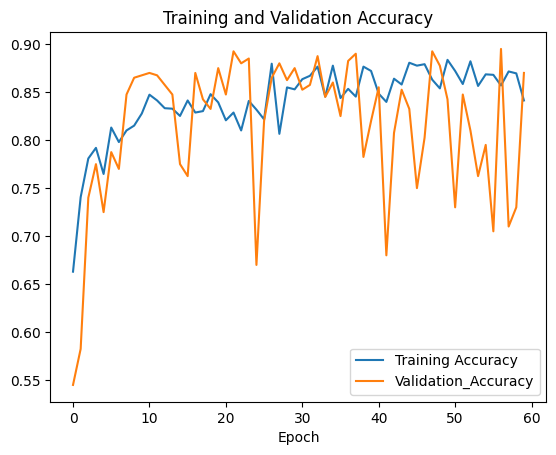

In [ ]:
accuracy=training.history['accuracy']
validation_accuracy=training.history['val_accuracy']
plt.plot(epochs_range,accuracy,label='Training Accuracy')
plt.plot(epochs_range,validation_accuracy,label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

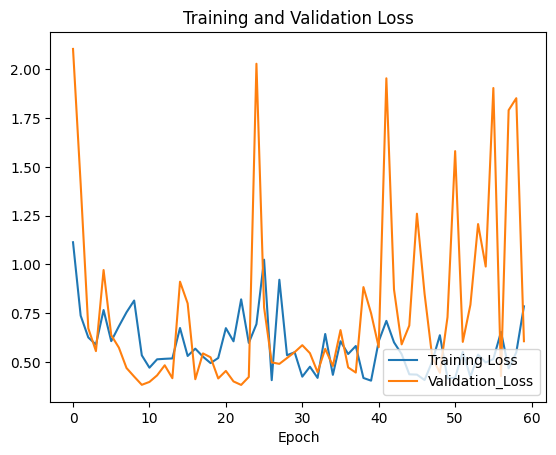

In [ ]:
loss=training.history['loss']
validation_loss=training.history['val_loss']
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,validation_loss,label='Validation_Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

6/6 [==============================] - 0s 71ms/step - loss: 0.1678 - accuracy: 0.9583
Test accuracy : 0.9583333134651184


In [ ]:
model.layers
conv1=model.layers[0]
weights1 = conv1.get_weights()
len(weights1)

In [ ]:
kernels1=weights1[0]
kernels1.shape


In [ ]:
kernel_weights=[]
for i in range(kernels1.shape[3]):
  kernel_temp=kernels1[:, :,0, i]
  kernel_weights.append(kernel_temp)

print(len(kernel_weights))
kernel1_1 = kernels1[:, :,0, 0]
kernel1_2 = kernels1[:, :,0, 1]
kernel1_3 = kernels1[:, :,0, 2]

#kernel1_1.shape

In [ ]:
kernel1_2.shape

In [ ]:
kernel1_3.shape

In [ ]:
plt.imshow(kernel_weights[0])


In [ ]:
for image, _ in test_ds.take(1):
    first_image = image[0]

test_image = first_image[:, :, :]
plt.imshow(test_image)


In [ ]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0

    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1

    return num_pixels

In [ ]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]

    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))

    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]

            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))

    return convolved_img

In [ ]:
fig = plt.figure(figsize= (128, 128))

for j in range(len(kernel_weights)):
  ax = fig.add_subplot(100, 100, j+1)
  filtered_image = convolve(test_image, kernel_weights[j])
  ax.imshow(filtered_image)

In [ ]:
filtered_image = convolve(test_image, kernel1_1)
plt.imshow(filtered_image)


In [ ]:
test_image = test_ds[3, :, :, 0]
plt.imshow(test_image)

TypeError: ignored

Model 2 wtih added Pooling Layers, more hidden layers,with same epoch range



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,Activation,GlobalAveragePooling2D,
BatchNormalization

model2 = Sequential()
model2.add(Conv2D(64, kernel_size=3,
                 input_shape=(image_size[0], image_size[1], 1)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2))
model2.add(Activation('relu'))
model2.add(Conv2D(128, kernel_size=3))
model2.add(MaxPooling2D(2))
model2.add(Activation('relu'))
model2.add(Conv2D(256, kernel_size=3))
model2.add(MaxPooling2D(2))
model2.add(Activation('relu'))
model2.add(GlobalAveragePooling2D())
model2.add(Dense(2, activation='softmax'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 124, 124, 64)     0         
 2D)                                                             
                                                                 
 activation_3 (Activation)   (None, 124, 124, 64)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                             
                                                                 
 activation_4 (Activation)   (None, 61, 61, 128)      

Epoch 1/15
125/125 [==============================] - 27s 183ms/step - loss: 2.3841 - accuracy: 0.4932 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 2/15
125/125 [==============================] - 23s 183ms/step - loss: 0.6937 - accuracy: 0.5174 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/15
125/125 [==============================] - 23s 180ms/step - loss: 0.6928 - accuracy: 0.5058 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/15
125/125 [==============================] - 22s 170ms/step - loss: 0.6929 - accuracy: 0.5058 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 5/15
125/125 [==============================] - 23s 181ms/step - loss: 0.6923 - accuracy: 0.5229 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 6/15
125/125 [==============================] - 23s 181ms/step - loss: 0.6937 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 7/15
125/125 [==============================] - 22s 168ms/step - loss: 0.6929 - accuracy: 0.5063 - val_loss: 0.6932 - val_ac

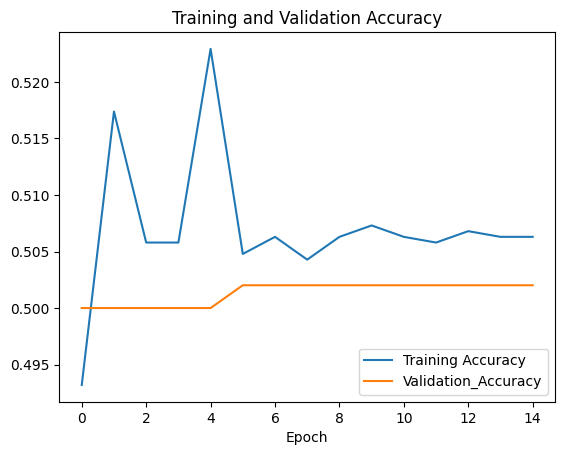

In [ ]:
epochs = 60
epochs_range=range(epochs)

model2.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
training=model2.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)
accuracy=training.history['accuracy']
validation_accuracy=training.history['val_accuracy']
plt.plot(epochs_range,accuracy,label='Training Accuracy')
plt.plot(epochs_range,validation_accuracy,label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
#introduce dropout layers to decrease overfitting
#Regularizers- L1 L2

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs


  Preparing metadata (setup.py) ... done


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow_docs.vis import embed
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import imageio

In [ ]:
df['labels']=df['filepaths'].apply(lambda x: x.split("/")[4])


In [ ]:
class_dict={}
for idx,label in enumerate(df['labels'].unique().tolist()):
    class_dict[label]=idx
print(class_dict)


{'sarscov2-ctscan-dataset': 0}


In [ ]:
df['labels']=df['labels'].map(class_dict)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df['filepaths'].values,df['labels'].values,test_size=0.2,random_state=42,shuffle=True)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1984,) (497,) (1984,) (497,)


In [ ]:
batch_size = 16
num_channels = 3
num_classes = 2
image_size = 250
latent_dim = 128

In [ ]:
all_digits = np.concatenate([X_train, X_test])
all_labels = np.concatenate([y_train, y_test])

array(['/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (254).png',
       '/content/drive/MyDrive/sarscov2-ctscan-dataset/non-COVID/Non-Covid (807).png',
       '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (543).png',
       ...,
       '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (77).png',
       '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (1096).png',
       '/content/drive/MyDrive/sarscov2-ctscan-dataset/COVID/Covid (329).png'],
      dtype=object)

In [ ]:
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
print(generator_in_channels, discriminator_in_channels)

130 5


In [ ]:
# Create the discriminator.
discriminator = keras.Sequential(
    [
        keras.layers.InputLayer((28, 28, discriminator_in_channels)),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

# Create the generator.
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels,)),
        # We want to generate 128 + num_classes coefficients to reshape into a
        # 7x7x(128 + num_classes) map.
        layers.Dense(7 * 7 * generator_in_channels),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, generator_in_channels)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid"),
    ],
    name="generator",
)